### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Independent Variable**: The congurent and incongurent words

**Dependent Variable**: The time taken to name the colours in equally-sized lists

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis $H_{0}$:  Average time taken to name the colors of incongurent words is less than congurent words

Alternate Hypothesis $H_{1}$: Average time taken to name the colors of incongurent words is more than congurent words

In order words,

$H_{0}$: $𝜇_{incongurent}$ - $𝜇_{congurent}$ ≤ 0

$H_{1}$: $𝜇_{incongurent}$ - $𝜇_{congurent}$ > 0

We'll perform the two-sample t-test as it will help determine the average time taken by the participants in the two word conditions is significant or not. 

The assumptions of the paired t-test are as follows:
1. The sample size is small (< 30).
2. The sample is approximately normally distributed.
3. The populations standard deviation is not known.
4. The two samples are dependent since, it is being performed by the same participant. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import math
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
print("The mean time taken by the participants in congruent and incongruent word conditions are: \n{}\n".format(df.mean()))
print("The median time taken by the participants in congruent and incongruent word conditions are: \n{}\n".format(df.median()))
print("The standard of deviation for the time taken by the participants in congruent and incongruent word conditions are: \n{}".format(df.std()))

The mean time taken by the participants in congruent and incongruent word conditions are: 
Congruent      14.051125
Incongruent    22.015917
dtype: float64

The median time taken by the participants in congruent and incongruent word conditions are: 
Congruent      14.3565
Incongruent    21.0175
dtype: float64

The standard of deviation for the time taken by the participants in congruent and incongruent word conditions are: 
Congruent      3.559358
Incongruent    4.797057
dtype: float64


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

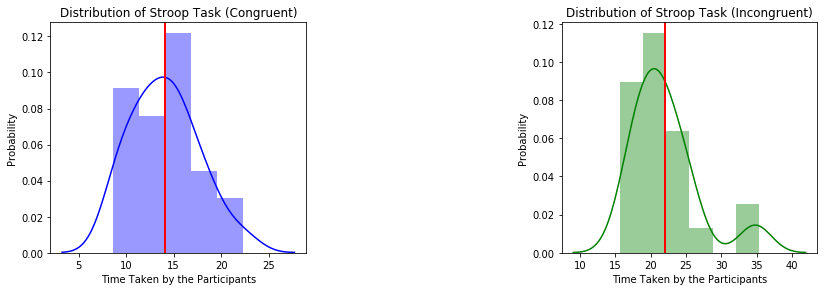

In [3]:
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.9, top=0.9, wspace=1, hspace=1)

#Congurent
ax = sns.distplot(df.Congruent, ax=axes[0], color="blue");
ax.set_title("Distribution of Stroop Task (Congruent)");
ax.set(xlabel='Time Taken by the Participants', ylabel='Probability');
ax.axvline(x=df.mean()[0], linewidth="2", color='r');

#Incongruent
ax = sns.distplot(df.Incongruent, ax=axes[1], color="green");
ax.set_title("Distribution of Stroop Task (Incongruent)");
ax.set(xlabel='Time Taken by the Participants', ylabel='Probability');
ax.axvline(x=df.mean()[1], linewidth="2", color='r');

In the congruent distribution chart, the distribution seems to be normally distributed being its mean lying at 14.0511. While in the incongruent distribution chart, the distribution seems to be positively skewed along with some outliers showing another bump in the distribution chart.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [4]:
t_critical = round(t.ppf(.95, 23),4)
df['Difference'] = df['Congruent'] - df['Incongruent']
diff_std = round(df['Difference'].std(),4)

t_statistic = (df.Incongruent.mean() - df.Congruent.mean())/(diff_std/math.sqrt(24))
print("t-critical: {}".format(t_critical))

print("Standard deviation for difference: {}".format(diff_std))

print("The calculated t-statistic is: {}".format(t_statistic))

t-critical: 1.7139
Standard deviation for difference: 4.8648
The calculated t-statistic is: 8.020751311833964


Confidence Interval: 95%

Degree of Freedom: n-1 = 24-1 = 23

Mean Differences = Mean of Incongruent - Mean of Congruent = 22.015917 - 14.051125 = 7.964792

The t-critical is less than t-statistic. We reject the null hypothesis that the average time taken to name the colors of incongurent words is less than congurent words. 

The result matches to my expectation.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

### References

1. https://seaborn.pydata.org/generated/seaborn.distplot.html